# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
    
Date - The date and time of a given UFO sighting. This column contains numeric values seperated by hyphens  in the form of yy-mm-dd-hh-mm.
    
Country - The country that a UFO sighting took place in. All of the sightings took place in either the United States (represented as USA) or Canada (represented as CANADA). Since there are only 2 values, this data might be best represented as an enumeration. There are no missing values, special values, or obvious errors in this column

City - The city that a UFO sighting took place in. There are many different values, so this is best represented as a string. There are no missing values, special values, or obvious errors in this column.
     
State - The state (or province) that a UFO sighting took place in. There are at least 50 unique values for this column, so a string would best represent this data. There are no missing values, special values, or obvious errors in this column.
    
Shape - The shape the UFO appeared as in a given sighting. There are many different shapes used to describe this, so a string would represent the data best. Some of the shapes are listed as "Unknown", besides that there are no missing values, special values, or obvious errors in this column.
    
Summary - A description of a given UFO sighting. In the ufo_sightings_simplified dataset, all of these descriptions are reduced to the value REDACTED. 
       
Lat - The latitude of a given UFO sighting. Values range from ~19 to ~67 to seven decimal values. This data would be best represented by a float.     
    
Long - The longitude of a given UFO sighting. Values range from ~-60 to ~-162 to seven decimal values. This data would be best represented by a float.

</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
* a scatterplot of locations of each UFO sighting and their midpoints for a given day. The scatterplot's x-axis would be longitude and y-axis would be latitude. We would select one of the days with the highest number of UFO sightings, then plot each sighting on the scatterplot with black dots. Following that, the geographic midpoint of all points on that scatterplot would be calculated and plotted with a red dot.
    
* a bar chart with American states on the x-axis and number of UFO sightings on y-axis. This would show the difference in UFO sightings in different states in the USA. 
    
* a histogram with datetime on the x-axis and number of UFO sightings on the y-axis. This would show the change in the number of UFO sightings over time.
        
* a bar chart with months on the x-axis and number of UFO sightings on the y-axis. This would show how UFO sightings may vary by month. The number of UFO sightings for each month would be summed up across all years and locations. 
    
* a scatterplot with longitude on the x-axis and latitude on the y-axis. Each UFO sighting would be plotted. This would show how particular geographic locations may have more ufo sightings than others across time.
    
</font>

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

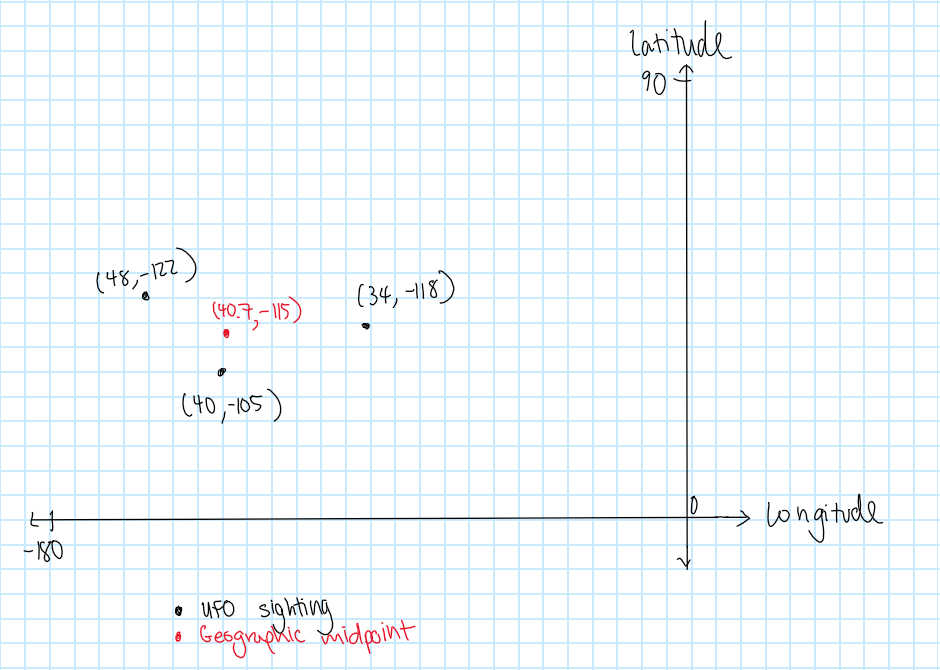

### Step 2a: Building
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">
    
We choose to represent the date and time, longitude and latitude. This information is crucial because we want to plot the UFO sightings for the day with the most sightings. Our scatterplot will use the longitude as our x-axis and the latitude as our y-axis, to emulate a map. The longitude and latitude coordinates are also necessary for us to calculate their averages and find the geographic midpoint of multiple sightings.

</font>

#### Design data definitions

In [18]:
from cs103 import *
import csv
from typing import NamedTuple, List
import matplotlib.pyplot as plt

##################
# Data Definitions

Sighting = NamedTuple("Sighting", [("date", str),
                                   ("lat", float),
                                   ("long", float)])
# interp. a UFO sighting, with a date ("date"), and a location with a latitude ("lat") and longitude ("long")

S1 = Sighting("16-08-21-20-45", 38.0652286, -78.90588756)
S2 = Sighting("16-12-21-19-15", 33.5603938, -114.912069)
S3 = Sighting("16-11-11-05-30", 33.7358518, -118.2922933)
S4 = Sighting("16-10-11-19-15", 61.2163129, -149.8948522)

@typecheck
#template based on Compound
def fn_for_sighting(s : Sighting) -> ...:
    return ...(s.date,
               s.lat,
               s.long)

# List[Sighting]
# interp. a list of UFO sightings

LOS0 = []
LOS1 = [S1, S2, S3, S4]

@typecheck
def fn_for_los(los: List[Sighting]) -> ...:
    # template based on arbitrary-sized
    
    # description of accumulator
    acc = ... # type: ...
    for s in los:
        acc = ...(s, acc)
    
    return ...(acc)


Date = NamedTuple("Date", [('month', int), # in range [1,12]
                            ('day', int)]) # in range [1,31]

# interp. a date with month and day both as integers

D1 = Date(12, 31)
D2 = Date(1, 1)
D3 = Date(5, 1)

@typecheck
# template based on Compound
def fn_for_date(d: Date) ->...:
    return ...(d.month, d.day)

# List[Date]
# interp. a list of Dates

LOD1 = []
LOD2 = [D1, D2, D3]

@typecheck
# template based on arbitrary-sized with reference rule
def fn_for_lod(lod: List[Date]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    for d in lod:
        acc = ...(d, acc)
    
    return ...(acc)

UFOSighting = NamedTuple("UFOSighting", [("datetime", Date),
                                   ("lat", float),
                                   ("long", float)])
# interp. a UFO sighting, with a date consisting of a month and a day ("datetime") and a location with a latitude ("lat") and longitude ("long")

US1 = UFOSighting(Date(8, 21), 38.0652286, -78.90588756)
US2 = UFOSighting(Date(12, 21), 33.5603938, -114.912069)
US3 = UFOSighting(Date(11, 11), 33.7358518, -118.2922933)
US4 = UFOSighting(Date(10, 11), 61.2163129, -149.8948522)

@typecheck
#template based on Compound with reference rule
def fn_for_ufo_sighting(us : UFOSighting) -> ...:
    return ...(fn_for_date(us.datetime),
               us.lat,
               us.long)


# List[UFOSighting]
# interp. a list of UFO sightings with datetime dates

LOUS0 = []
LOUS1 = [US1, US2, US3, US4]

@typecheck
def fn_for_los(lous: List[UFOSighting]) -> ...:
    # template based on arbitrary-sized with reference rule
   
    # description of accumulator
    acc = ... # type: ...
    for us in lous:
        acc = ...(fn_for_ufo_sighting(us), acc)
    
    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

In [2]:
###########
# Helper Functions

@typecheck
def str_to_datetime(los: List[Sighting]) -> List[UFOSighting]:
    """
    Takes in a list of Sightings, whose dates have a string datatype (e.g. "16-12-21-19-15") and returns a 
    new list of sightings (UFOSighting) with dates as datatype Date (e.g. Date(12, 21)).
    """
    # return [] # stub
    # Template from Sighting
    
    # list of updated Sightings seen so far
    dated_ufo_sightings = [] # type: List[UFOSighting]
    
    if los == []:
        return []
    
    else:
        for s in los:
            month = s.date[3:5]
            day = s.date[6:8]

            # get rid of leading zeroes for day and month
            if day[0] == 0:
                day = day[1]
            else:
                day = day
            if month[0] == 0:
                month = month[1]
            else:
                month = month

            # Update Sighting with new datatype, Date as new datatype, UFOSighting
            s = UFOSighting(Date(int(month), int(day)), s.lat, s.long)

            dated_ufo_sightings.append(s)
        return dated_ufo_sightings

# Begin testing
start_testing()

# Examples and tests for str_to_datetime
expect(str_to_datetime([]), [])
expect(str_to_datetime([S1]), [US1])
expect(str_to_datetime([Sighting("16-12-21-19-15", 38.0652286, -78.90588756), 
                        Sighting("16-06-12-21-00", 35.8845238, -84.153526),
                        Sighting("16-11-11-05-30", 40.282292, -104.7780808),
                        Sighting("16-11-11-00-00", 44.9958075,-123.0197172)]),
                      [UFOSighting(Date(12,21), 38.0652286, -78.90588756),
                      UFOSighting(Date(6, 12), 35.8845238, -84.153526),
                      UFOSighting(Date(11,11), 40.282292, -104.7780808),
                      UFOSighting(Date(11,11), 44.9958075,-123.0197172)])

# show testing summary
summary()

@typecheck
def number_of_sightings(lous: List[UFOSighting], d : Date) -> int:
    """
    returns the number of sightings observed on a given day (Date) in a list of UFO sightings (lous). returns 0 if
    there are no sightings on the specified day
    """
    #return -1   #stub
    #template from List[UFOSighting]
    
    # n stores the number of sightings on the specified date seen so far
    n = 0 # type: int
    for us in lous:
        if us.datetime == d:
            n = n + 1
    
    return n

# Begin testing
start_testing()

# Examples and tests for number_of_sightings
expect(number_of_sightings(LOUS1, Date(12,21)), 1)
expect(number_of_sightings(LOUS1, Date(10,21)), 0)
expect(number_of_sightings([US2, US2, US3, US2], Date(12,21)), 3)

# show testing summary
summary()

@typecheck
def most_sightings_date(lous : List[UFOSighting]) -> Date:
    '''
    returns the day that has the most UFO sightings. assumes the list is not empty. in the event of a tie, the 
    date to appear first in the list is reported
    '''
    #return Date(12, 31)   #stub
    # template from List[UFOSighting]
    
    # date_most stores the date with the most UFO sightings seen so far
    date_most = Date(12, 31) # type: Date
    for us in lous:
        if number_of_sightings(lous, us.datetime) > number_of_sightings(lous, date_most):
            date_most = us.datetime
    
    return date_most

# Begin testing
start_testing()

# Examples and tests for most_sightings_date
expect(most_sightings_date(LOUS1), Date(8, 21))
expect(most_sightings_date([US1, US1, US2]), Date(8, 21))
expect(most_sightings_date([US1, US2, US2, US3, US3, US3]), Date(11, 11))

# show testing summary
summary()

@typecheck
def ufo_sightings_on_day(d : Date, lous : List[UFOSighting]) -> List[UFOSighting]:
    '''
    returns a list of all of the ufo sightings observed on a given day. returns an empty list if no ufo 
    sightings occurred on that day
    '''
    #return []   #stub
    #template from List[UFOSighting]
    
    # sights stores the sightings on the specified day seen so far
    sights = [] # type: List[UFOSightings]
    for us in lous:
        if us.datetime == d:
            sights.append(us)
    
    return sights

# Begin testing
start_testing()

# Examples and tests for ufo_sightings_on_day
expect(ufo_sightings_on_day(Date(1, 1), []), [])
expect(ufo_sightings_on_day(Date(1, 1), LOUS1), [])
expect(ufo_sightings_on_day(Date(8, 21), LOUS1), [US1])

# show summary
summary()

@typecheck
def avg_latitude(lous : List[UFOSighting]) -> float:
    '''
    returns the average latitude of a list of UFO sightings (lous). assumes that the list is not empty.
    '''
    #return []    #stub
    #template from List[UFOSighting]
    
    # lats stores the sum of the latitudes seen so far
    lats = 0   #type: float
    # n stores the amount of UFO sightings seen so far
    n = 0      # type: int
    for us in lous:
        lats = us.lat + lats
        n = n + 1
    
    return lats/n

# Begin testing
start_testing()

# Examples and tests for avg_latitude
expect(avg_latitude([US1]), 38.0652286)
expect(avg_latitude([US2, US3]), (33.5603938+33.7358518)/2)

# Show summary
summary() 

@typecheck
def avg_longitude(lous : List[UFOSighting]) -> float:
    '''
    returns the average longitude of a list of UFO sightings (lous). assumes that the list is not empty.
    '''
    #return []    #stub
    #template from List[UFOSighting]
    
    # lats stores the sum of the latitudes seen so far
    longs = 0   #type: float
    # n stores the amount of UFO sightings seen so far
    n = 0      # type: int
    for us in lous:
        longs = us.long + longs
        n = n + 1
    
    return longs/n

# Begin testing
start_testing()

# Examples and tests for avg_longitude
expect(avg_longitude([US1]), -78.90588756)
expect(avg_longitude([US2, US3]), (-114.912069 + -118.2922933)/2)

# Show summary
summary() 

@typecheck
def list_coordinates(lous: List[UFOSighting]) -> (List[float], List[float]):
    """
    Returns a list of latitudes and a list of longitudes from a list of ufo sightings 
    and the midpoint of all ufo sightings as last entry in the list
    """
    
    # return [] # stub
    # Template based on List[UFOSighting]
    
    ufo_day = most_sightings_date(lous) #day with most ufo sightings
    sightings_of_interest = ufo_sightings_on_day(ufo_day, lous) # list of ufo sightings on ufo_day
    
    if lous == []:
        return ([], [])
    
    else:
        #list of latitude values to plot
        lat_vals = [] # type : List[float]

        # list of longitude values to plot
        long_vals = [] # List[float]

        for s in sightings_of_interest:
            lat_vals.append(s.lat)
            long_vals.append(s.long)

        # add midpoint value to list
        if len(lous) > 1:
            lat_vals.append(avg_latitude(lous))
            long_vals.append(avg_longitude(lous))

        return lat_vals, long_vals

# Begin testing
start_testing()

# Examples and tests for list_coordinates
expect(list_coordinates([]), ([], []))
expect(list_coordinates([US1]), ([38.0652286],[-78.90588756]))
expect(list_coordinates([UFOSighting(Date(11,11), 38.0, -78.0),
                      UFOSighting(Date(11, 11), 35.0, -84.0),
                      UFOSighting(Date(11,11), 40.0, -104.0),
                      UFOSighting(Date(11,11), 44.0,-123.0)]),
                        ([38.0, 35.0, 40.0, 44.0, 39.25],
                        [-78.0, -84.0, -104.0, -123.0, -97.25]))

# Show summary
summary() 

@typecheck
def set_bounds(lof: List[float]) -> List[float]:
    """
    Finds the maximum value from a list of coordinates (longitude or latitude) and adds 10
    to each to be used as the higher end of axis range on our scatterplot.
    
    Finds the minimum value from a list of coordinates and subtracts 10
    to each to be used as the lower end of axis range on our scatterplot.
    
    If list is empty, assigns maximum = 180 and minimum = -180
    """
    
    # return [2.3, 4.9] # stub
    # template based on arbitrary-sized
    
    if lof == []:
        return [180.0, -180.0]
    
    else:
        ## find maximum value
        # stores maximum value seen so far in the list
        max_value = -180 # type : float

        for f in lof:
            if f > max_value:
                max_value = f        

        ## find minimum value
        # stores minimum value seen so far in the list
        min_value = 180 # type: float

        for f in lof:
            if f < min_value:
                min_value = f

        return [(max_value + 10), (min_value -10)]

# Begin testing
start_testing()

# Examples and tests for set_bounds
expect(set_bounds([]), [180.0, -180.0])
expect(set_bounds([10.0]), [20.0, 0.0])
expect(set_bounds([10.0, 20.0, 30.0]), [40.0, 0.0])

# Show summary
summary()

3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed


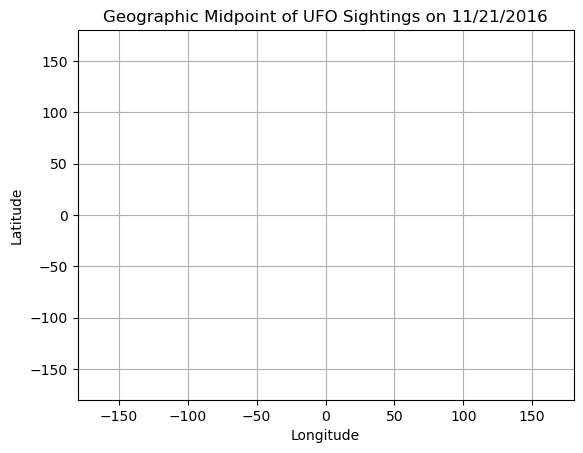

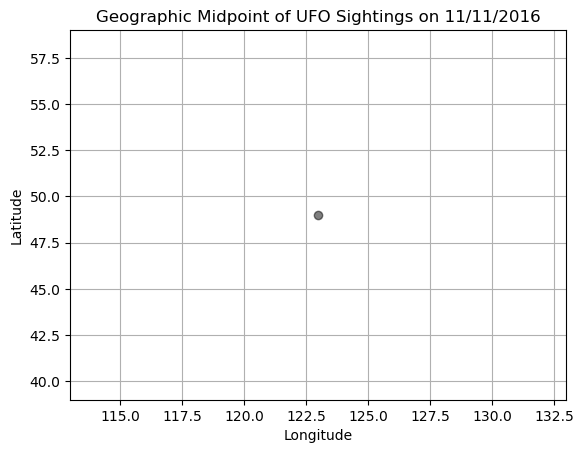

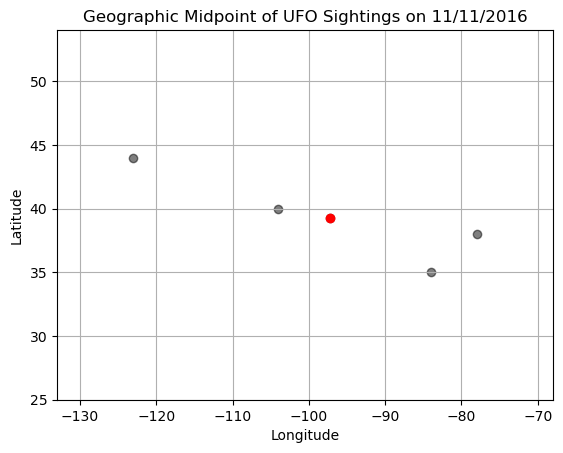

3 of 3 tests passed


In [14]:
# sample data
some_latitudes = [38.0, 35.0, 40.0, 44.0, 39.25]
some_longitudes = [-78.0, -84.0, -104.0, -123.0, -97.25]

# Make a scatterplot
@typecheck
def plot_ufo_sightings(lat: List[float], long: List[float], d : Date) -> None:
    """
    Displays a scatterplot with mapped out UFO sightings and their midpoint.
    x-axis is longitude and y-axis is latitude.
    
    Date is the day on which these UFO sightings occurred.
    Assumes sighting occurred in 2016.
    """
    
    # return None # stub
    # Template based on visualization
    
    # set the axes labels
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographic Midpoint of UFO Sightings on ' + str(d.month) + '/' + str(d.day) + '/2016') 

    # range for the axes
    # [x-min, x-max, y-min, y-max] where x-axis is lon, y-axis is lat
    lat_bounds = set_bounds(lat)
    long_bounds = set_bounds(long)
    
    plt.axis([long_bounds[1], long_bounds[0], lat_bounds[1], lat_bounds[0]])

    # create the scatterplot
    plt.scatter(long, lat, marker='o', c= 'k', alpha = 0.5)
    
    # distinguish midpoint value with red colour
    if len(lat) > 2:
        plt.scatter([long[-1]], [lat[-1]], marker = 'o', c = 'r')
    
    # add gridlines
    plt.grid()
    
    # show the plot
    plt.show()
    
    return None

start_testing()

# Should display an empty graph with x-axis "Longitude", y-axis "Latitude", and title "Geographic Midpoint of UFO Sightings on' + ''"
expect(plot_ufo_sightings([],[], Date(11,21)), None)

# Should display a graph labelled the same as above. Contents shown in markdown cell below.
expect(plot_ufo_sightings([49], [123], Date(11, 11)), None)

# Should display a graph labelled the same as above. Contents shown in markdown cell below.
expect(plot_ufo_sightings(some_latitudes, some_longitudes, Date(11,11)), None)

summary()

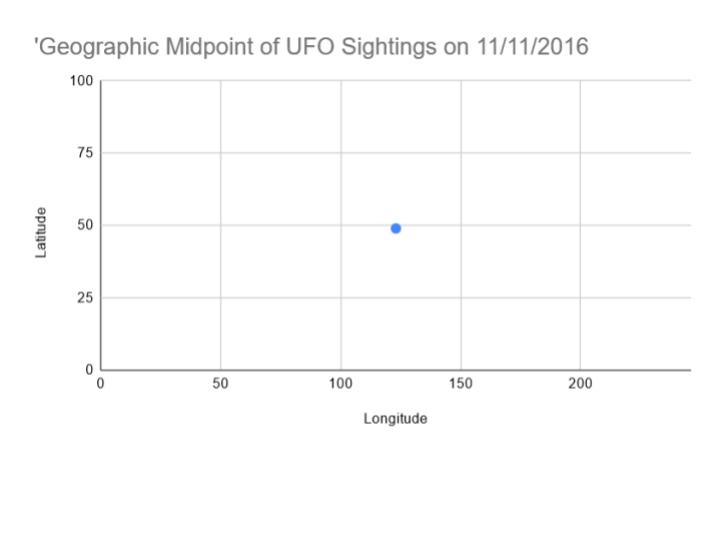

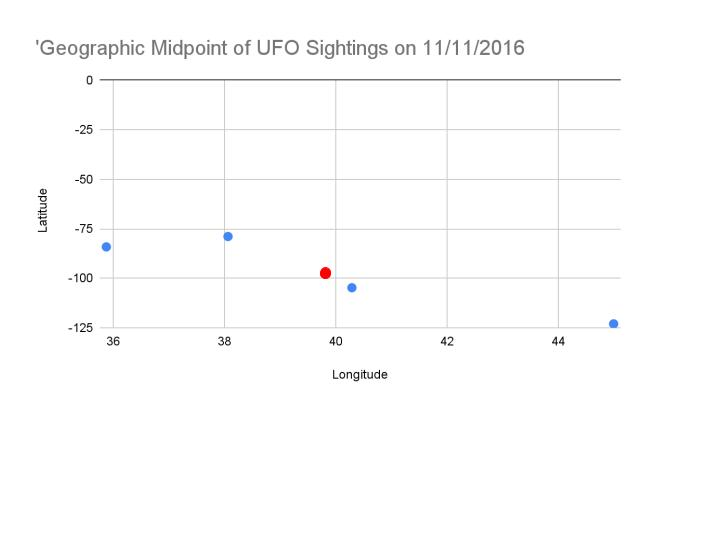

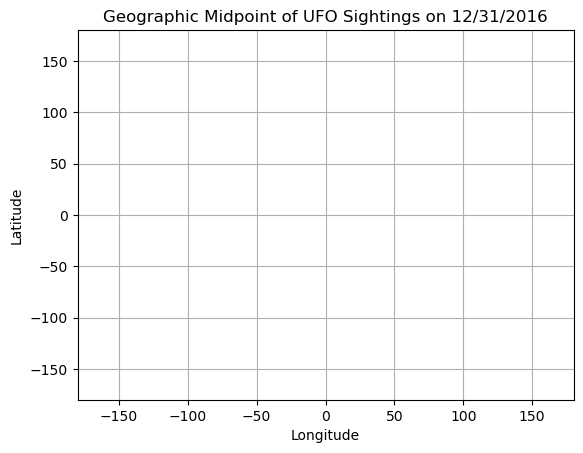

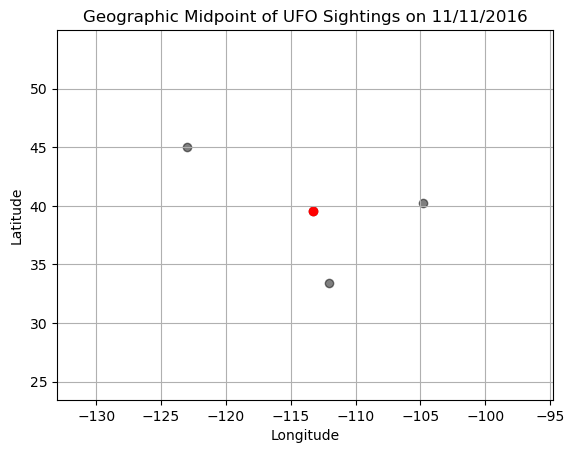

2 of 2 tests passed


In [16]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, returns a scatterplot 
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename)) 
    
    

@typecheck
def read(filename: str) -> List[UFOSighting]:
    """    
    reads information from the specified file and returns a list of UFO sightings 
    with the date, longitude, and latitude.
    """
    #return []  #stub
    # Template from HtDAP
    # los contains the list of UFO sightings seen so far
    los = [] # type: List[Sighting]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            s = Sighting(row[0], parse_float(row[6]), parse_float(row[7]))
            los.append(s)
            
        los = str_to_datetime(los) # change date from string to Date(month, day) data form            
    
    return los

start_testing()

# Examples and tests for main
expect(..., ...)

summary()


# Begin testing
start_testing()

# Examples and tests for read
expect(read("ufo_sightings_zero.csv"), [])
expect(read("ufo_sighting_one.csv"),
       [UFOSighting(Date(12, 21), 38.0652286,-78.90588756)])
expect(read("ufo_sightings_simplified-test1.csv"),
        [UFOSighting(Date(12, 21), 38.0652286, -78.90588756),
        UFOSighting(Date(10, 12), 35.8845238, -84.153526),
        UFOSighting(Date(11, 11), 40.282292, -104.7780808),
        UFOSighting(Date(11, 11), 44.9958075, -123.0197172),
        UFOSighting(Date(10, 11), 33.4485866, -112.0773455)])

# show testing summary
summary()

@typecheck
def analyze(lous: List[UFOSighting]) -> None: 
    """ 
    Takes a list of UFO sightings and finds the date on which the most ufo sightings occurs.
    Calculates the geographic midpoint of all the UFO sightings on that day. 
    Plots all the UFO Sightings from the date of most sightings as well as their geographic midpoint onto a scatteplot.
    """ 
    
    # return None # stub
    # template based on function composition
    
    ufo_day = most_sightings_date(lous) # day of most sightings
    ufo_plot_list = ufo_sightings_on_day(ufo_day, lous) # list of ufo sightings going on the scatterplot
    lat, lon = list_coordinates(ufo_plot_list) # lat and lon values for scatterplot

    plot_ufo_sightings(lat, lon, ufo_day) # make a scatterplot
    
    return None


start_testing()

# Examples and tests for analyze 
expect(analyze([]), None)
expect(analyze([UFOSighting(Date(12, 21), 38.0652286, -78.90588756),
        UFOSighting(Date(10, 12), 35.8845238, -84.153526),
        UFOSighting(Date(11, 11), 40.282292, -104.7780808),
        UFOSighting(Date(11, 11), 44.9958075, -123.0197172),
        UFOSighting(Date(11, 11), 33.4485866, -112.0773455)]), None)

summary()

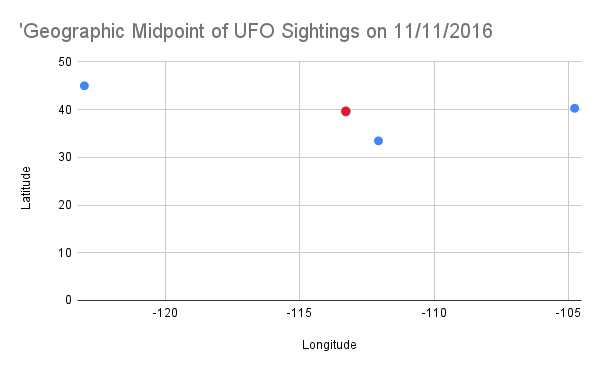

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

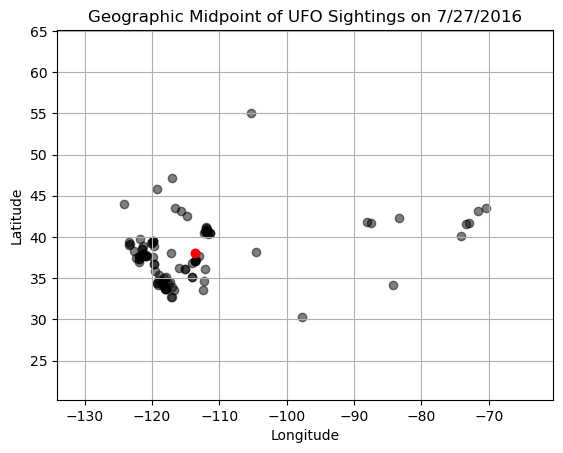

In [17]:
main("ufo_sightings_simplified.csv")

In [ ]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 123409
ASSIGNMENT = 1615244 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.